In [84]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/ML/air

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/ML/air'
/content/drive/.shortcut-targets-by-id/18Ltirf4CTbmFDC0X6MqW7_u_hylkWpfP/air


In [85]:
"""
EXTREME LEARNING MACHINES (ELM)
"""

'\nEXTREME LEARNING MACHINES (ELM)\n'

In [86]:
import json
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import pinv2
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,median_absolute_error,r2_score

            Date  Delhi
0     2015-01-01  472.0
1     2015-01-02  454.0
2     2015-01-03  143.0
3     2015-01-04  319.0
4     2015-01-05  325.0
...          ...    ...
2004  2020-06-27  112.0
2005  2020-06-28  196.0
2006  2020-06-29  233.0
2007  2020-06-30  114.0
2008  2020-07-01  101.0

[2009 rows x 2 columns]
[472. 454. 143. ... 233. 114. 101.]


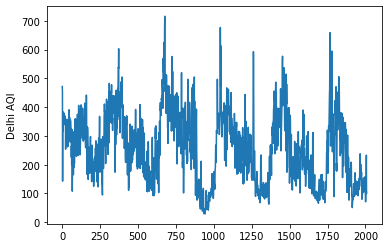

In [87]:
#DELHI AQI

delhi_AQI_df=pd.read_csv('/content/drive/MyDrive/ML/air/ws_max_2015/c_d_AQI.csv',usecols=['Date','Delhi'])
print(delhi_AQI_df)

aqi_arr = delhi_AQI_df['Delhi'].to_numpy()
print(aqi_arr)
plt.plot(aqi_arr)
plt.ylabel('Delhi AQI')
plt.show()

In [88]:
data = np.reshape(aqi_arr, (-1, 1))
data

array([[472.],
       [454.],
       [143.],
       ...,
       [233.],
       [114.],
       [101.]])

In [89]:
#HYPERPARAMETERS
split_ratio=0.7
look_back=14
hidden_cells=100

In [90]:
m = look_back #LOOKBACK
size = int(len(data) * split_ratio)
d_train, d_test = data[0:size], data[size:len(data)]
mean_train = np.mean(d_train)
sd_train = np.std(d_train)
d_train = (d_train-mean_train)/sd_train
d_test = (d_test-mean_train)/sd_train

In [91]:
X_train = np.array([d_train[i][0] for i in range(m)])
y_train = np.array(d_train[m][0])
for i in range(1,(d_train.shape[0]-m)):
    l = np.array([d_train[j][0] for j in range(i,i+m)])
    X_train = np.vstack([X_train,l])
    y_train = np.vstack([y_train,d_train[i+m]])
X_test = np.array([d_test[i][0] for i in range(m)])
y_test = np.array(d_test[m][0])
for i in range(1,(d_test.shape[0]-m)):
    l = np.array([d_test[j][0] for j in range(i,i+m)])
    X_test = np.vstack([X_test,l])
    y_test = np.vstack([y_test,d_test[i+m]])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1392, 14)
(1392, 1)
(589, 14)
(589, 1)


In [92]:
import scipy.stats as stats
input_size = X_train.shape[1]
hidden_size = hidden_cells   #no. of hidden neurons
mu, sigma = 0, 1
w_lo = -1 
w_hi = 1
b_lo = -1 
b_hi = 1
#initialising input weights and biases randomly drawn from a truncated normal distribution
input_weights = stats.truncnorm.rvs((w_lo - mu) / sigma, (w_hi - mu) / sigma, loc=mu, scale=sigma,size=[input_size,hidden_size])
biases = stats.truncnorm.rvs((b_lo - mu) / sigma, (b_hi - mu) / sigma, loc=mu, scale=sigma,size=[hidden_size])
def relu(x):      #hidden layer activation function
    return np.maximum(x, 0, x)

In [93]:
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H
output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out
prediction = predict(X_test)

In [94]:
correct = 0
total = X_test.shape[0]
y_test = (y_test*sd_train) + mean_train
prediction = (prediction*sd_train) + mean_train
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(y_test, prediction))
print('Test RMSE: %.3f' % rmse)
mape_sum = 0
for i,j in zip(y_test,prediction):
    mape_sum = mape_sum + (abs((i-j)/i))
mape = (mape_sum/total)*100
mpe_sum = 0
for i,j in zip(y_test,prediction):
    mpe_sum = mpe_sum + ((i-j)/i)
mpe = (mpe_sum/total)*100
print('Test MAPE: %.3f' % mape)
print('Test MPE: %.3f' % mpe)

Test RMSE: 49.142
Test MAPE: 18.269
Test MPE: -6.038


Text(0.5, 1.0, 'Extreme Learning Machine (ELM)')

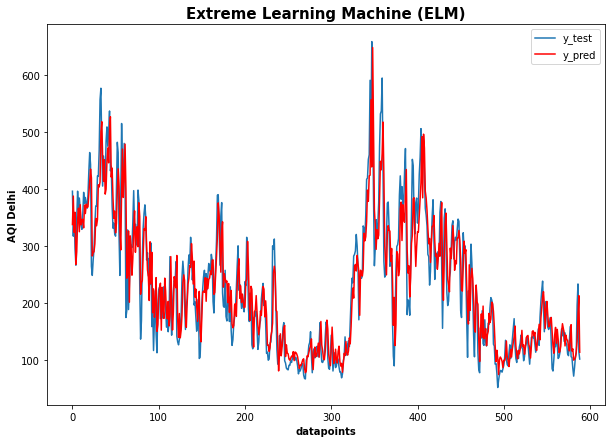

In [95]:
# plot forecasts against actual outcomes
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(y_test,label = 'y_test')
ax.plot(prediction, color='red',label = 'y_pred')
ax.legend()
plt.ylabel('AQI Delhi',fontweight='bold')
plt.xlabel('datapoints',fontweight='bold')
plt.title('Extreme Learning Machine (ELM)',fontweight='bold',fontsize=15)

In [96]:
print("R2 Score = ",r2_score(y_test,prediction))
print("Variance Score = ",explained_variance_score(y_test,prediction))
print("\nMean Absolute Error (MAE) = ",mean_absolute_error(y_test,prediction))
print("Mean Squared Error (MSE) = ",mean_squared_error(y_test,prediction))
print("Root Mean Squared Error (RMSE) = ",mean_squared_error(y_test,prediction,squared=False))
print("Mean Absolute Percentage Error (MAPE) = ",mean_absolute_percentage_error(y_test,prediction))
print("Meadian Relative Absolute Error (MRAE) = ",median_absolute_error(y_test,prediction))


R2 Score =  0.8264528774954361
Variance Score =  0.8265476468564114

Mean Absolute Error (MAE) =  36.48796935283365
Mean Squared Error (MSE) =  2414.943564797807
Root Mean Squared Error (RMSE) =  49.14207530007058
Mean Absolute Percentage Error (MAPE) =  0.18269141825855686
Meadian Relative Absolute Error (MRAE) =  28.041225150005403


In [97]:
ELM_res=[r2_score(y_test,prediction),
         explained_variance_score(y_test,prediction),
         mean_absolute_error(y_test,prediction),
         mean_absolute_percentage_error(y_test,prediction),
         mean_squared_error(y_test,prediction,squared=False)]
print("ELM_res =",ELM_res)

ELM_res = [0.8264528774954361, 0.8265476468564114, 36.48796935283365, 0.18269141825855686, 49.14207530007058]
